## Анализ и прогнозирование временных рядов методами искусственного интеллекта

### **Практическая работа 3. Поиск аномалий во временных рядах.**


#### **3.1 Поиск диссонансов с помощью алгоритма HotSAX**

In [1]:
!pip install saxpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.0/179.0 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.5/227.5 kB 14.2 MB/s eta 0:00:00
  Created wheel for saxpy: filename=saxpy-1.0.1.dev167-py3-none-any.whl size=17689 sha256=cc7a718eb287efc66bf9148a13c07a32293eabbbd516c43d1177f3bad53c53a0
  Stored in directory: /root/.cache/pip/wheels/d4/06/c3/f226109b89f615fa451878c3fb8f37110889e575343fc04891
Successfully built saxpy


##### *Краткое описание*

##### 3.1.1 Загрузка и подготовка данных

В данной будет использоваться временной ряд, состоящий из показаний акселерометра.
Анализируемый временной ряд, описывает две активности человека - бег и шаг
.


In [2]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/MyDrive/TimeSeriesCourse/practice/03 Discords')

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import numpy as np
from saxpy.znorm import znorm
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from time import time


In [6]:
#fixme: Путь
data_path = Path('dataset')/'walk_run.txt'
data = np.loadtxt(data_path)[3000:4000]
walk_run = np.loadtxt(data_path)[3000:4000]
# data = np.genfromtxt('./dataset/walk_run.txt')[3000:4000]
size_sub = 50

В середине временного ряда происходит смена активности (бег заменяет шаг). Нетипичным поведением, которое мы могли бы назвать диссонансами в данном ряде выступает небольшой участок между активностями, когда человек плавно увеличивает скорость шага до бега. В ходе данной работе наша задача выделить с помощью различных алгоритмов границы нашего диссонанса.

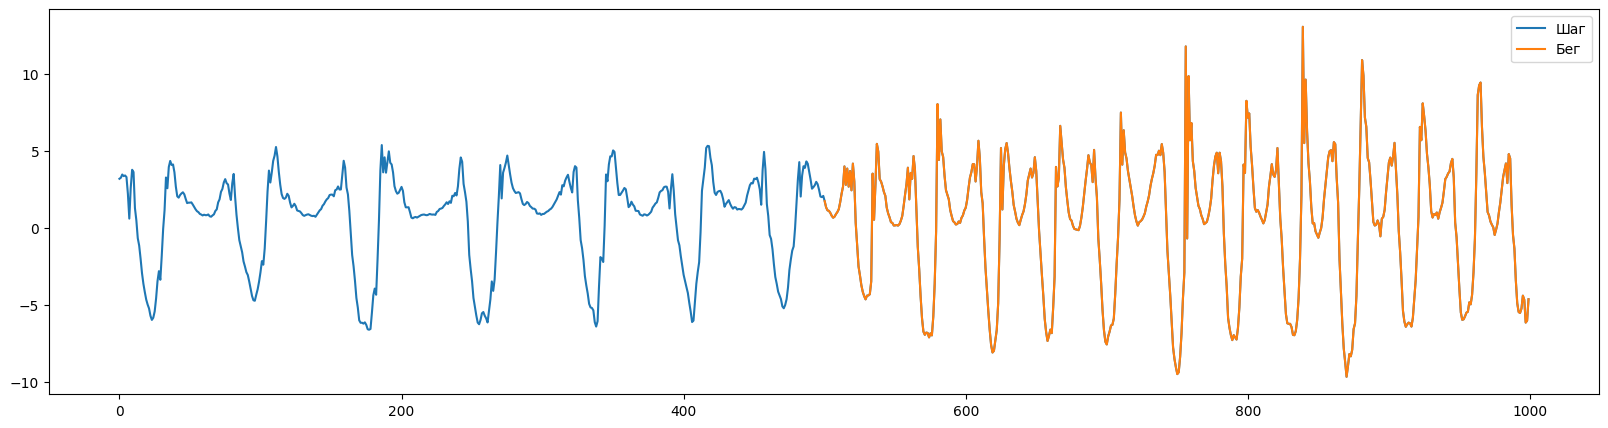

In [7]:
fig, ax =  plt.subplots(figsize=(20,5),ncols=1,nrows=1)
plt.plot(data[:],label='Шаг')
plt.plot(np.arange(data.shape[0] // 2,data.shape[0]),data[data.shape[0] // 2:],label='Бег')
plt.legend()

In [8]:
result={}
times={}

##### 3.1.2 Реализация перебором

Приводится пример кода для нахождения топ 5 диссонансов с помощью реализация перебором.
Вам необходимо добавить код для сбора времени обработки данных.

In [9]:
from saxpy.discord import find_discords_brute_force

start = time()
discords_brute_force= np.stack(find_discords_brute_force(data[:], 50, 5))
end = time()
result['brute_force'] = discords_brute_force
times['brute_force'] = end-start


In [10]:
result['brute_force']

array([[477.        ,   5.88100934],
       [412.        ,   5.32704317],
       [195.        ,   3.39426635],
       [577.        ,   3.35554403],
       [278.        ,   3.10959389]])

##### 3.1.3 HotSAX

Используя [реализацию](https://github.com/seninp/saxpy/blob/master/saxpy/hotsax.py) найдите топ 5 диссонансов ряда.
Произведите замер времени работы.

In [11]:
from saxpy.hotsax import find_discords_hotsax

start = time()
discords_hotsax = find_discords_hotsax(data[:], num_discords=5, win_size=size_sub)
end = time()
result['brute_HotSAX'] = discords_hotsax
times['HotSAX'] = end - start

In [12]:
print(times['HotSAX'])
result['brute_HotSAX']

9.085377216339111


[(477, 5.881009341683914),
 (412, 5.327043167878002),
 (195, 3.394266347302333),
 (577, 3.3555440274836608),
 (278, 3.10959388763498)]

##### 3.1.4 Визаулизация

Вам необходимо реализовать код позволяющий:
1. Вывести на одном графике ряд и его диссонансы
2. Столбчатую диаграмму времени работы
   
Постройте графики для обоих алгоритмов и сравните полученные результаты. Сделайте выводы

Text(0.5, 0.98, 'Перебор vs HotSAX')

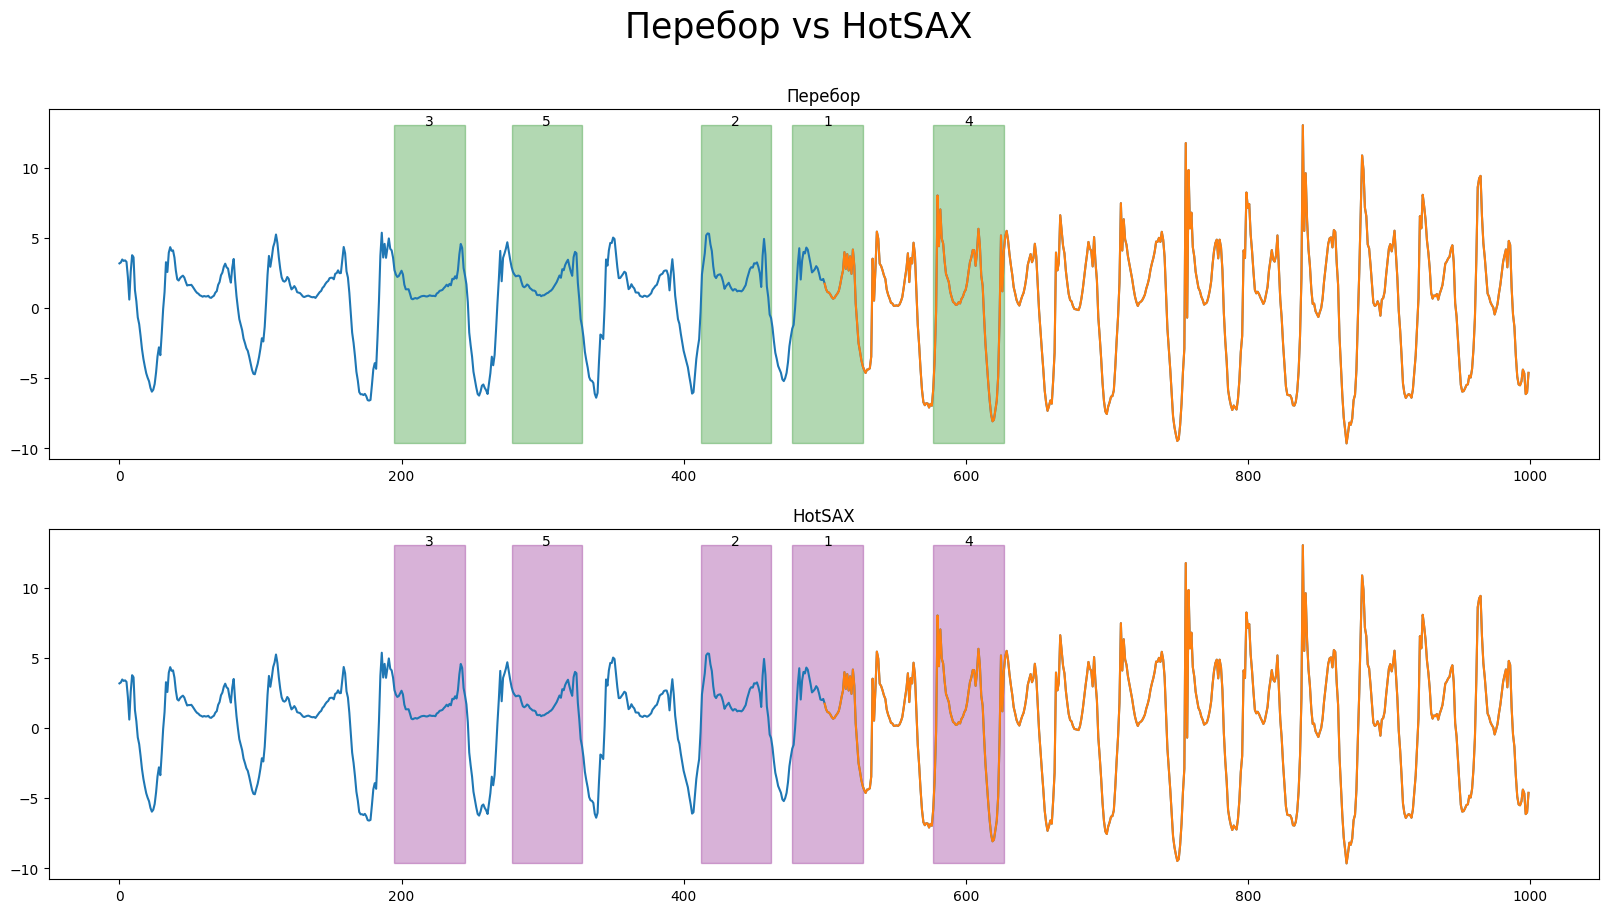

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))
mn, mx = min(data), max(data)

for i in range(len(discords_brute_force)):
    ax1.add_patch(Rectangle(xy=(discords_brute_force[i][0], mn), width=size_sub, height=mx-mn, color='green', alpha=0.3))
    ax1.text(discords_brute_force[i][0] + size_sub / 2, mx, f"{i + 1}", ha='center')
ax1.plot(data[:])
ax1.set_title('Перебор')
ax1.plot(np.arange(data.shape[0] // 2, data.shape[0]), data[data.shape[0] // 2:])

for i in range(len(discords_hotsax)):
    ax2.add_patch(Rectangle(xy=(discords_hotsax[i][0], mn), width=size_sub, height=mx-mn, color='purple', alpha=0.3))
    ax2.text(discords_hotsax[i][0] + size_sub / 2, mx, f"{i + 1}", ha='center')
ax2.plot(data[:])
ax2.set_title('HotSAX')
ax2.plot(np.arange(data.shape[0] // 2, data.shape[0]), data[data.shape[0] // 2:])

fig.suptitle('Перебор vs HotSAX', fontsize=25)

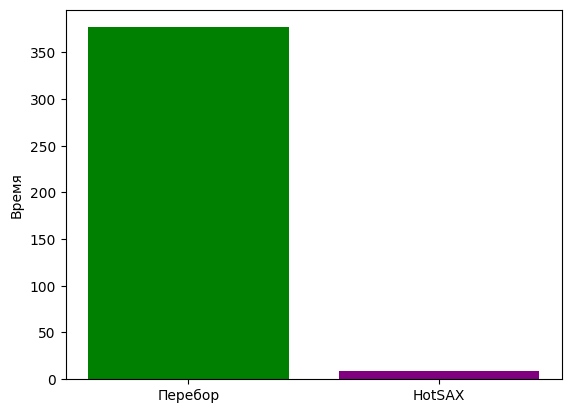

In [14]:
fig, ax = plt.subplots()
ax.bar(['Перебор', 'HotSAX'], [times['brute_force'], times['HotSAX']], color=['g', 'purple'])
ax.set_ylabel('Время');

Вывод: В поиске диссонансов алгоритм HotSAX, ожидаемо, справляется с задачей на порядки быстрее обычного брутфорса

In [15]:
from matplotlib.patches import Rectangle

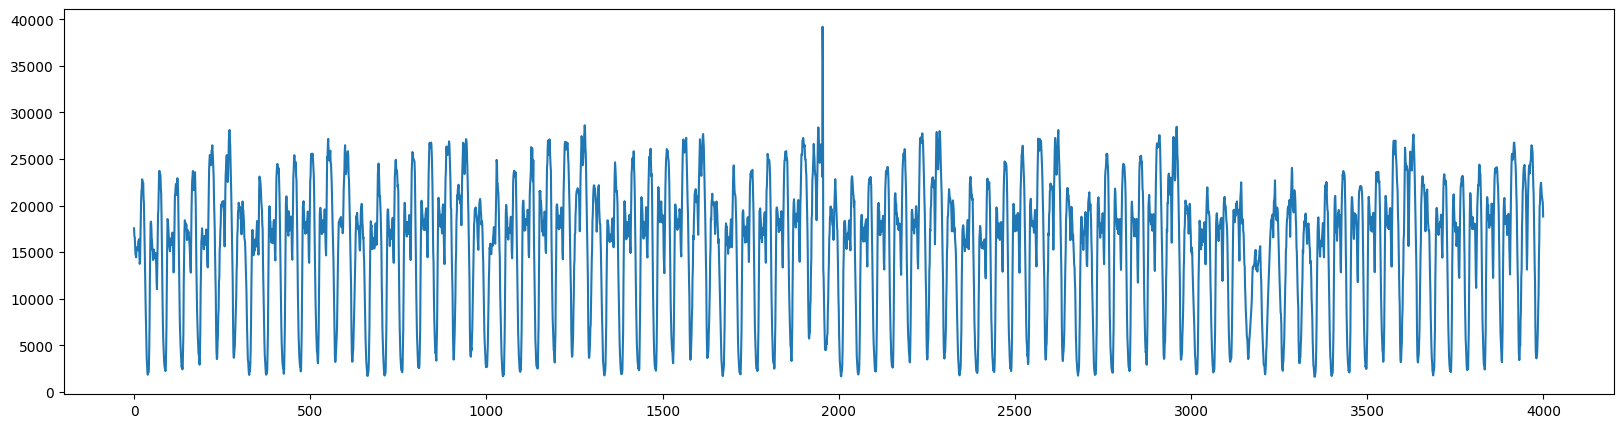

In [16]:
import pandas as pd
nyc_taxi = pd.read_csv('./dataset/nyc_taxi.csv',index_col=0).values[4000:8000,0].astype(np.float64)
fig = plt.figure(figsize=(20, 5))
plt.plot(nyc_taxi)

In [17]:
discords_brute_force = find_discords_brute_force(nyc_taxi[:], num_discords=2, win_size=size_sub) # 53 минуты

In [18]:
discords_hotsax = find_discords_hotsax(nyc_taxi[:], num_discords=5, win_size=size_sub) #39 секунд

Text(0.5, 0.98, 'Перебор vs HotSAX')

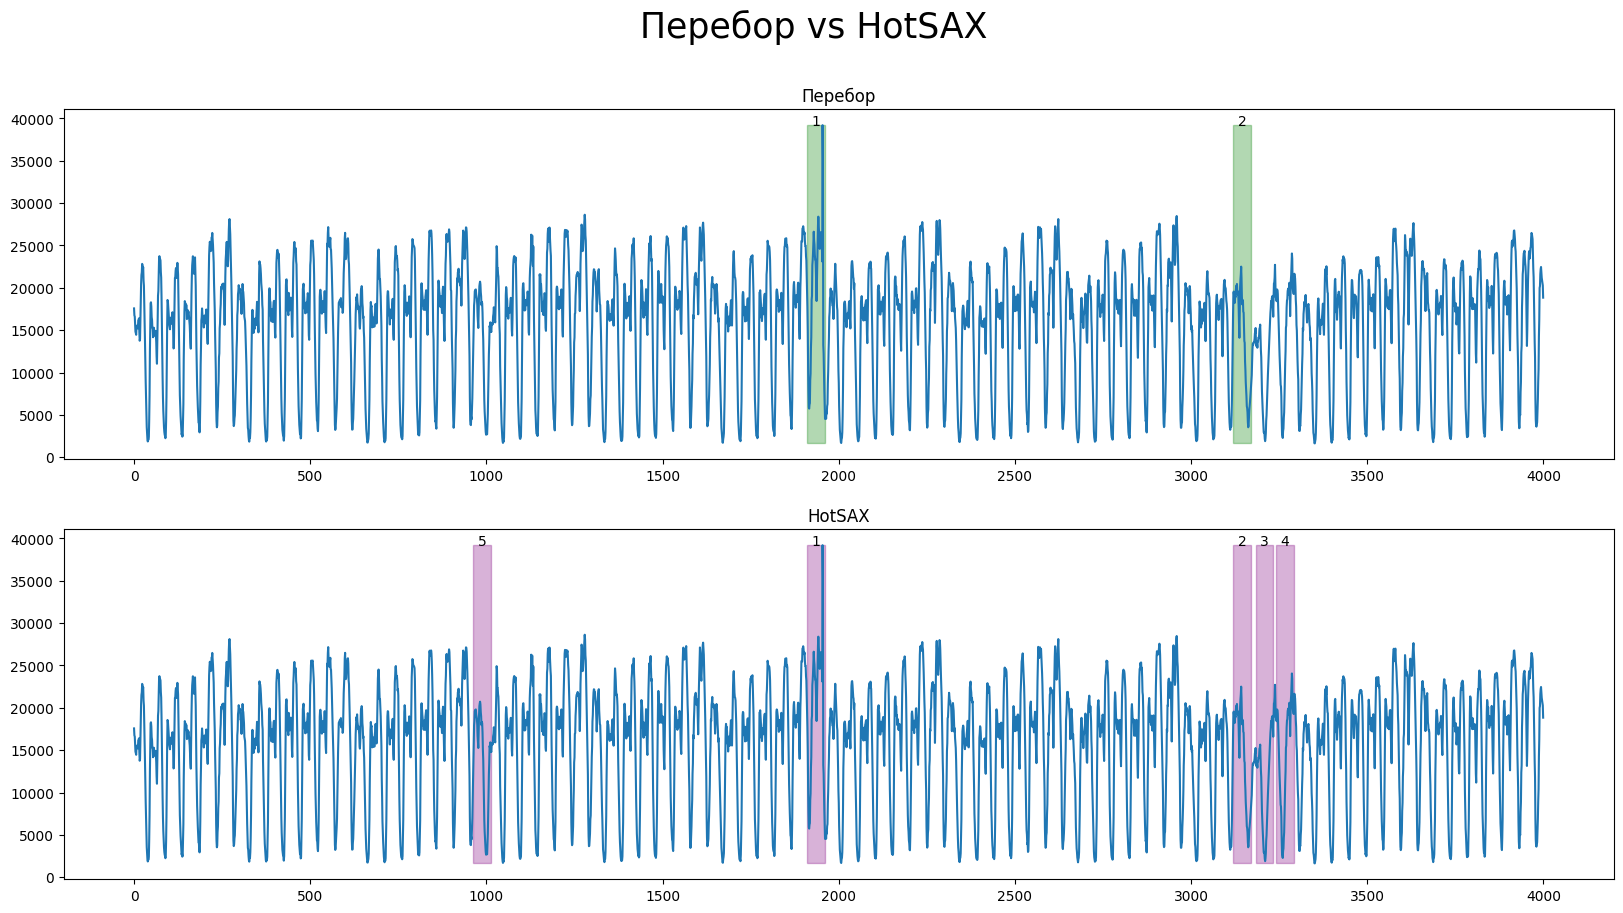

In [19]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))
mn, mx = min(nyc_taxi), max(nyc_taxi)

for i in range(len(discords_brute_force)):
    ax1.add_patch(Rectangle(xy=(discords_brute_force[i][0], mn), width=size_sub, height=mx-mn, color='green', alpha=0.3))
    ax1.text(discords_brute_force[i][0] + size_sub / 2, mx, f"{i + 1}", ha='center')
ax1.plot(nyc_taxi[:])
ax1.set_title('Перебор')

for i in range(len(discords_hotsax)):
    ax2.add_patch(Rectangle(xy=(discords_hotsax[i][0], mn), width=size_sub, height=mx-mn, color='purple', alpha=0.3))
    ax2.text(discords_hotsax[i][0] + size_sub / 2, mx, f"{i + 1}", ha='center')
ax2.plot(nyc_taxi[:])
ax2.set_title('HotSAX')

fig.suptitle('Перебор vs HotSAX', fontsize=25)

#### **3.2 Поиск диссонансов с помощью алгоритма DRAG**

In [20]:
!pip install stumpy==1.11.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 kB 2.9 MB/s eta 0:00:00


In [21]:
import stumpy
from stumpy import core, config
from stumpy.scrump import _prescrump

from modules.drag import find_candidates
from modules.drag import DRAG

Как мы помним из лекций:

Диапазонный диссонанс – подпоследовательность ряда, расстояние от которой до ее ближайшего соседа не ниже заданного порога.

Основными параметрами при поисках диссонансов являются:

 $m$- длина диссонанса

 $r$- пороговое значение расстояния подпоследовательности ряда, до его ближайшего соседа


Для поиска диссонансов в данной части практической работы мы воспользуемся алгоритмом DRAG (Discord Range Aware Gathering). Для начала воспользуемся данным алгоритмом, чтобы найти диссонансы в наборе данных содержащем активность человека.

In [22]:
# data = walk_run

Длину искомого диссонанса, как и для предыдущих алгоритмов, мы установим равно 50 точек. Пороговое значение мы установим равным большим, чтобы узнать, как алгоритм отреагирует на большие значения данного параметра.

In [23]:
from modules.drag import find_candidates
m = 50
r = 10
idxs, _, _ = DRAG(data,m,r)
print(f'Колличество найденных диссонансов: {len(idxs)}')

Колличество найденных диссонансов: 0


Как вы можете видеть мы установили слишком большое пороговое значение, алгоритму не удалось выделить ни одного диссонанса. Попробуем уменьшить пороговое значение до 1, чтобы улучшить результат.

In [24]:
m = 50
r = 1
idxs, _, _ = DRAG(data, m, r)
print(f'Колличество найденных диссонансов: {len(idxs)}')

Колличество найденных диссонансов: 50


При такой комбинации параметров, улучшить ситуацию не получилось. Алгоритм выделил слишком большое количество диссонансов, часть которых является ложными диссонансами и не будут информативными для нас.

In [25]:
m = 50
r = 10
idxs_r_10, _, _ = DRAG(nyc_taxi, m, r)
print(f'Колличество найденных диссонансов: {len(idxs_r_10)}')

Колличество найденных диссонансов: 0


In [26]:
m = 50
r = 1
idxs_r_1, _, _ = DRAG(nyc_taxi, m, r)
print(f'Колличество найденных диссонансов: {len(idxs_r_1)}')

Колличество найденных диссонансов: 42


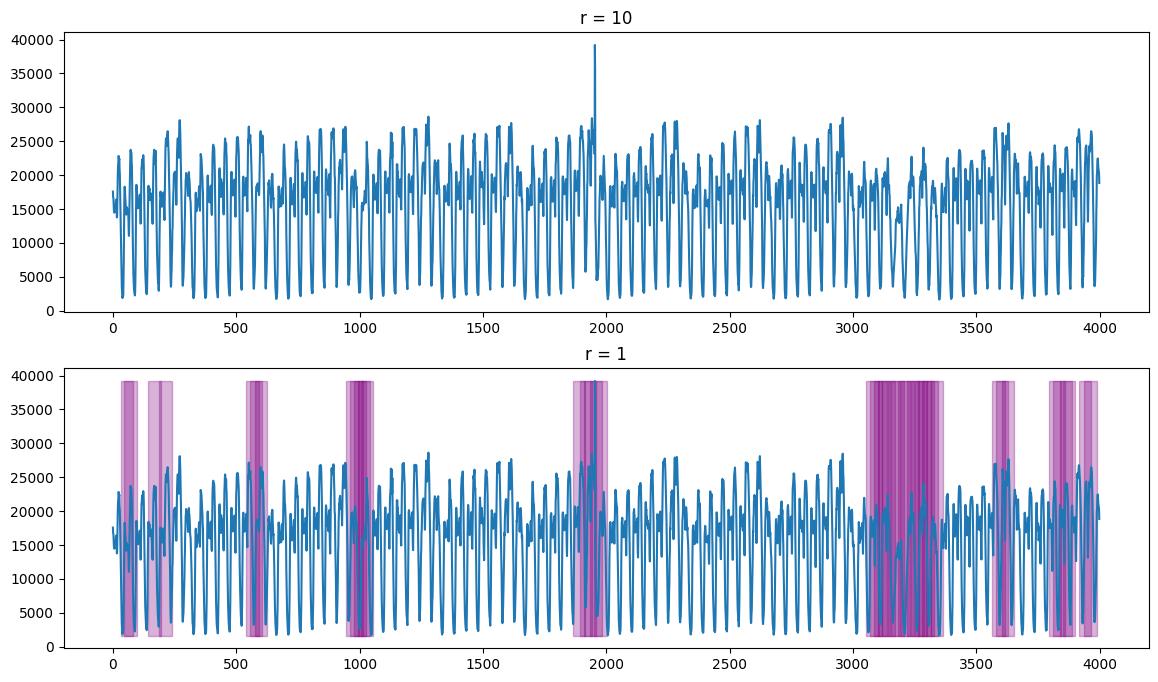

In [27]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))
ax1.set_title('r = 10')
ax2.set_title('r = 1')
mn, mx = min(nyc_taxi), max(nyc_taxi)

for i in range(len(idxs_r_10)):
    alpha = 0.3
    ax1.add_patch(Rectangle(xy=(idxs_r_10[i], mn), width=size_sub, height=mx-mn, color='g', alpha=alpha))
ax1.plot(nyc_taxi)

for i in range(len(idxs_r_1)):
    alpha = 0.3
    ax2.add_patch(Rectangle(xy=(idxs_r_1[i], mn), width=size_sub, height=mx-mn, color='purple', alpha=alpha))
ax2.plot(nyc_taxi)

Чтобы разобраться, почему так происходит и как работает данный алгоритм, ниже мы реализуем все этапы алгоритма DRAG.

Как мы помним из лекций алгоритм DRAG содержит два этапа:

1.Отбор - За одно сканирование ряда сформировать множество кандидатов в диссонансы.

2.Очистка - За одно сканирование ряда отбросить кандидатов, которые являются ложными диссонансами.

##### 3.2.1 Отбор кандидатов

Первым этапом обработки данных является отбор множества потенциальных кандидатов. Мы вибраем из всего множества подпоследовательностей ряда такие, для которых растояния до правых ближайших соседей больше параметра $r$.

In [28]:
#выбирем более реальное значение для порога
r = 3

In [29]:
T, M_T, Σ_T = core.preprocess(data, m)
#формируем массив длинной равной длине  исходного ряда - m + 1,
#элемент массива является истинным,
#в том случае если подпоследовательность является потенциальным кандидатом
is_cands = find_candidates(T, m, M_T, Σ_T, r, init_cands=None, right=True)
#находим индексы потенциальных кандидатов
cand_index = np.flatnonzero(is_cands)

In [30]:

print(f'{len(cand_index)} {len(cand_index)/len(data)*100} %')

113 11.3 %


Во время отбора кандидатов нам удалось выделить около 140 подпоследовательностей(около 14%), которые мы бы могли назвать потенциальными диссонансами.
Это большой процент, который не может нас устраивать как конечный результат.
Если посмотреть на рисунок ниже, мы увидем, что большая часть потенциальных диссонансов расположена в районе смены активности.
К сожалению присуствуют и ложные диссонасы, которые случаныйм образом попали в данный список.

Сформируйте график найденных диссонансов

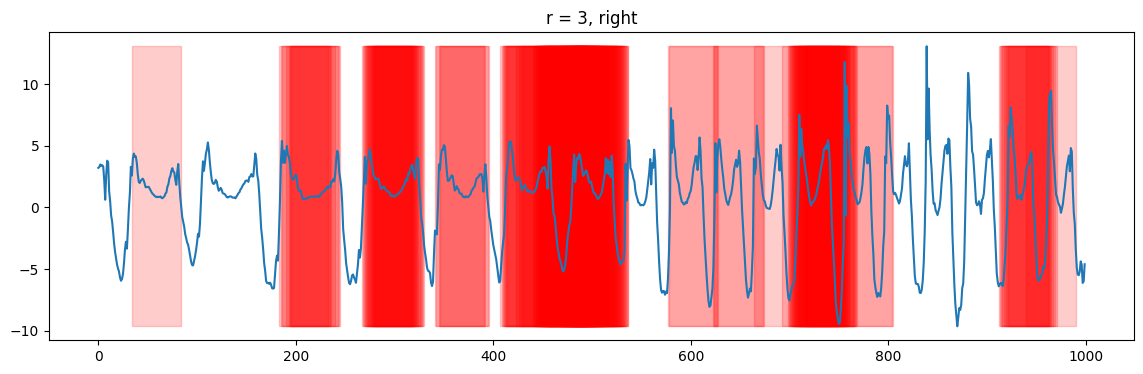

In [31]:
fig, ax = plt.subplots(figsize=(14, 4))
ax.set_title('r = 3, right')
mn, mx = min(data), max(data)

for i in range(len(cand_index)):
    alpha = 0.2
    ax.add_patch(Rectangle(xy=(cand_index[i], mn), width=size_sub, height=mx-mn, color='red', alpha=alpha))
ax.plot(data)


##### 3.2.2 Очистка кандидатов
Как уже упоминалось выше, 11.3% слишком большой процент диссонансов.
Для уменьшения числа потенциальных кандидатов произведем очистку от ложных диссонансов, путем сравнения расстояния до левых ближайших соседей потенциальных диссонансов с числом $r$.


In [32]:
is_cands = find_candidates(T, m, M_T, Σ_T, r, init_cands=is_cands, right=False)
cands = np.flatnonzero(is_cands)

In [33]:
len(cands)/len(data)*100

2.9000000000000004

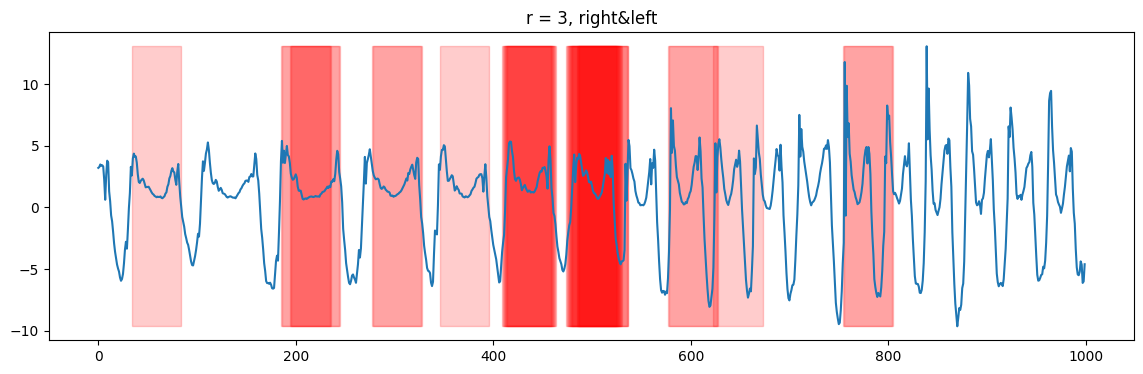

In [34]:
fig, ax = plt.subplots(figsize=(14, 4))
ax.set_title('r = 3, right&left')
mn, mx = min(data), max(data)

for i in range(len(cands)):
    alpha = 0.2
    ax.add_patch(Rectangle(xy=(cands[i], mn), width=size_sub, height=mx-mn, color='red', alpha=alpha))
ax.plot(data)


Нам удалось сократить число диссонансов до 2.9%. Если проанализировать рисунок, то можно заметить, что большая их часть является тривиальными повторениями подпоследовательности в области смены активности. На следующем шаге избавимся от них.

In [35]:
from modules.drag import refine_candidates
discords_idx, discords_dist, discords_nn_idx = refine_candidates(T, m, M_T, Σ_T, is_cands)
len(discords_idx)/len(data)*100

0.8999999999999999

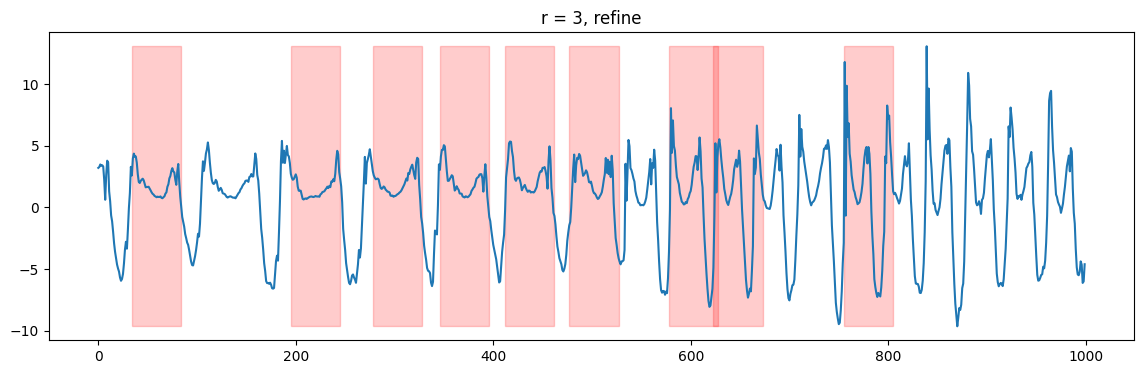

In [36]:
fig, ax = plt.subplots(figsize=(14, 4))
ax.set_title('r = 3, refine')
mn, mx = min(data), max(data)

for i in range(len(discords_idx)):
    alpha = 0.2
    ax.add_patch(Rectangle(xy=(discords_idx[i], mn), width=size_sub, height=mx-mn, color='red', alpha=alpha))
ax.plot(data)


##### 3.2.3 Подбор параметров

Подберите параметры $m$ и $r$ таким образом, чтобы алгоритм обнаружил только те диссонасы, которые связаны со сменой активности.
Сделайте вывод о том, как эти параметры влияют на качество работы модели. Подберите оптимальные параметры алгоритма для набора данных такси NY. Визуализируйте результаты для разных комбинаций. Сделайте выводы.

#### **3.3 Поиск диссонансов с помощью алгоритма Merlin**

##### *Краткое описание*

##### 2.3.1 Загрузка и подготовка данных
fixme: добавить описание данных и саму выгрузку данных

##### 2.3.2 Merlin

Используя [реализацию]() найдите топ 5 диссонансов ряда.
Произведите замер времени работы. (уточнить про реализацию поиска соседей)

##### 2.3.3 Визаулизация

Вам необходимо реализовать код позволяющий:
1. Вывести на одном графике ряд и его диссонансы
2. Графики времени работы
   
Постройте графики для моделей и сравните полученные результаты с алгоритмами из предыдущих пунктов.
Сделайте выводы